In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random


In [2]:
def activation(x):
  '''
    input: a 1-D array x

    output: sin of all values of array
  '''
  return np.sin(x)


def predict(X,weights,bias):
  '''
    input:
      1-D array X
      weights of the perceptron
      bias of the perceptron
    output:
      prediction of class
  '''

  z=X*weights+bias      
  ans=activation(z)     # activation wixi +b
  return ans




def loss(X,y,weights,bias):
  '''
    input:
      1-D array X
      weights of the perceptron
      bias of the perceptron
    output:
      Mean squared Error
  '''

  Y_=predict(X,weights,bias)    # get prediction
  mse=0
  for i in range(len(y)):
    mse+=(Y_[i]-y[i])**2        #calculate MSE
  return mse/(len(y))



def update(X,y,weights,bias,lr):
  '''
    input:
      1-D array X
      weights of the perceptron
      bias of the perceptron
      1-D array y denoting actual results
      lr: learning rate
    output:
      returns updated weight, bias
  '''

  Y_=predict(X,weights,bias)  
  #Chain rule for Delta learning
  #dC/dW=dC/dy * dy/dA * dA/dW
  dw=(y-Y_)                       
  grad=np.cos(X*weights+bias)

  #Update weights
  weights-=lr*np.mean(dw*grad*X)

  #Update bias
  bias-=lr*np.mean(dw*grad)

  return weights,bias


def train(X,y,lr=0.3,epochs=10000):
  '''
    input:
      1-D array X
      1-D array Y with actual results
      lr: Learning rate
      epochs: no of epochs
    output:
      returns weight,bias 
  '''

  #Initialising weights, bias with random value
  weights=random.uniform(1.2,2)
  bias=random.uniform(1.2,2)

  for i in range(epochs):
    #Use update
    weights,bias=update(X,y,weights,bias,lr)
    if i%500==0:
      #At every 500th epoch check prediction
      print(predict(X,weights,bias).T)
  return weights,bias


def predict_answer(X,weights,bias):
    '''
    input:
      single input x (!! not Array)
      weights of the perceptron
      bias of the perceptron
    output:
      prediction of class either 1 or -1 by setting threshold
    '''
    z=X*weights+bias
    ans=activation(z)     #Calculate answer
    
    #Predict class by putting appropriate threshold
    if ans>=0:
      return -1
    return 1



In [ ]:
X=np.array([0,2,4,6,8,10])
y=np.array([-1,1,-1,1,-1,1])
w,b=train(X,y,0.01)


In [6]:
#Test data with given X

for i in range(len(X)):
  print(X[i],"class:",predict_answer(X[i],w,b))

0 class: -1
2 class: 1
4 class: -1
6 class: 1
8 class: -1
10 class: 1


In [7]:
print(w,b)

1.5707963267948994 1.570796326794877


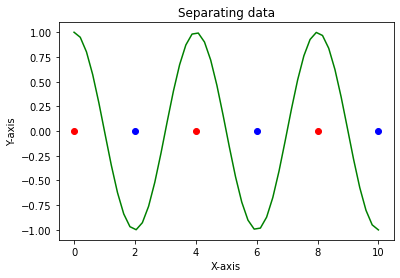

In [5]:
x=np.linspace(0,10)
y=np.sin(x*w + b)
X_0=[0,4,8]
X_1=[2,6,10]
plt.scatter(X_0,np.zeros(3), c='red')
plt.scatter(X_1,np.zeros(3), c='blue')
plt.plot(x,y, c='green')
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Separating data")
plt.show()